In [1]:
import news_extractor as news
import word_cloud as wordcloud
import pandas as pd
import numpy as np
from eventregistry import QueryItems

[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/zedong/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/zedong/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
news_fetcher = news.SectorNewsExtractor(api_key="4af8dc7c-de0c-4ded-b276-492685db7350")

In [3]:
# keyword = QueryItems.AND(["retail", "inflation"])
keyword = QueryItems.AND(["retail","inflation"])


In [4]:
news_fetcher.fetch_articles(keyword=keyword,
                            date_start="2022-06-13",
                            date_end="2022-06-16",
                            max_articles=20)

In [5]:
news_fetcher.get_summary_table()

,news date,news source,news sentiment
0,2022-06-16,marketwatch.com,0.074510
1,2022-06-14,wsj.com,0.403922
2,2022-06-15,finance.yahoo.com,-0.011765
3,2022-06-15,cnbc.com,0.145098
4,2022-06-15,wsj.com,0.129412
5,2022-06-15,reuters.com,-0.043137
6,2022-06-14,ft.com,0.050980
7,2022-06-15,reuters.com,0.050980
8,2022-06-15,wsj.com,0.607843
9,2022-06-15,reuters.com,0.160784


In [6]:
articles = news_fetcher.get_articles()

In [7]:
articles

[{'title': 'The Fed Got More Hawkish. How Long Will It Last?',
  'body': 'Find the latest Barron\'s stories on MW for well-rounded coverage and more expert financial advice you can trust.\n\nThe Federal Reserve\'s that it is serious about fighting inflation. But the Fed\'s communication is mixed and incongruous, making it tougher for investors to know which poison the central bank will pick.\n\nFirst, . The Fed expressed optimism over economic growth, saying that activity has picked up after declining in the first quarter, as job gains have been robust and unemployment low. That optimism is misplaced, in part because the job market is a lagging indicator, says George Goncalves, head of U.S. macro strategy at MUFG\'s institutional client group.\n\nMoreover, it conflicts with what the Fed didn\'t say. The new statement dropped a key line that had said the "committee expects inflation to return to its 2% objective and the labor market to remain strong." The removal of that sentence seems 

In [8]:
words = wordcloud.SectorWordCloud(articles)

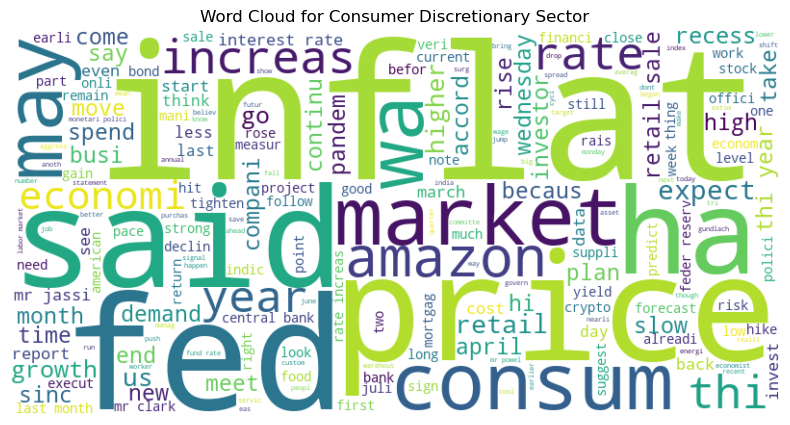

In [9]:
words.generate_word_cloud("Consumer Discretionary")

In [80]:
def drawdown(s):
    running_max = s.cummax()
    dd = (running_max - s) / running_max
    return dd

In [81]:
df = pd.read_csv("../Data/log_ret.csv", index_col='date')
df.index = pd.to_datetime(df.index)
subset = df.loc["2022-06-01": "2022-06-30",:].copy()

benchmark = pd.read_csv("../Mid Cap Index/mid_cap_index.csv",index_col='date')
benchmark.index = pd.to_datetime(benchmark.index)
benchmark = benchmark.loc["2022-06-01": "2022-06-30","log_ret"].rename("benchmark").copy()

In [70]:
# benchmark = subset.mean(axis=1)

In [82]:
abnormal = subset.sub(benchmark, axis=0)
abnormal

,Materials,Industrials,Health Care,Real Estate,Consumer Discretionary,Financials,Utilities,Information Technology,Energy,Consumer Staples,Communication Services
date,,,,,,,,,,,
2022-06-01,-0.000714,0.000492,-0.006841,0.000874,-0.004961,-0.006455,0.006014,0.002888,0.038479,-0.005094,0.008696
2022-06-02,0.002840,0.003835,0.008301,-0.012856,0.005920,-0.004721,-0.020365,0.012750,-0.027086,-0.001364,-0.002149
2022-06-03,-0.002342,0.004290,0.001434,-0.006017,0.000412,-0.002603,0.007532,-0.014282,0.023064,0.003980,-0.003972
2022-06-06,0.011954,0.006274,-0.019140,-0.007985,0.004659,0.000920,0.000378,-0.003575,0.009108,-0.006498,-0.011958
2022-06-07,-0.000765,-0.002648,0.005432,0.009627,-0.006161,-0.003833,-0.003624,0.001640,0.025443,-0.002556,-0.010489
2022-06-08,-0.015173,-0.005119,0.007788,-0.006842,0.009070,-0.000389,0.000788,-0.001409,0.006487,-0.001372,0.005987
2022-06-09,-0.004330,0.006371,-0.006479,-0.001350,0.005239,-0.004585,0.008197,-0.005410,0.005921,-0.003660,-0.004099
2022-06-10,-0.002769,-0.004350,0.005511,0.011635,-0.012753,-0.003068,0.023683,0.001888,0.011933,0.011152,0.001024
2022-06-13,-0.007645,0.006767,0.007783,-0.007915,-0.008434,0.011210,0.000210,-0.003732,-0.019817,0.005330,-0.011538


In [83]:
# abnormal_cret = np.exp(abnormal.cumsum())
abnormal_cret = abnormal.cumsum()

In [89]:
abnormal_cret

,Materials,Industrials,Health Care,Real Estate,Consumer Discretionary,Financials,Utilities,Information Technology,Energy,Consumer Staples,Communication Services
date,,,,,,,,,,,
2022-06-01,-0.000714,0.000492,-0.006841,0.000874,-0.004961,-0.006455,0.006014,0.002888,0.038479,-0.005094,0.008696
2022-06-02,0.002126,0.004327,0.001459,-0.011982,0.000959,-0.011176,-0.014351,0.015638,0.011393,-0.006458,0.006546
2022-06-03,-0.000216,0.008617,0.002893,-0.017999,0.001371,-0.013779,-0.006819,0.001356,0.034457,-0.002479,0.002574
2022-06-06,0.011738,0.014891,-0.016247,-0.025983,0.006030,-0.012859,-0.006441,-0.002220,0.043565,-0.008977,-0.009384
2022-06-07,0.010973,0.012243,-0.010815,-0.016357,-0.000130,-0.016692,-0.010065,-0.000580,0.069008,-0.011532,-0.019872
2022-06-08,-0.004201,0.007124,-0.003028,-0.023199,0.008939,-0.017081,-0.009277,-0.001989,0.075495,-0.012904,-0.013886
2022-06-09,-0.008531,0.013496,-0.009507,-0.024549,0.014178,-0.021666,-0.001080,-0.007399,0.081417,-0.016564,-0.017984
2022-06-10,-0.011300,0.009146,-0.003995,-0.012914,0.001425,-0.024734,0.022602,-0.005510,0.093350,-0.005412,-0.016961
2022-06-13,-0.018945,0.015913,0.003788,-0.020829,-0.007009,-0.013525,0.022812,-0.009243,0.073533,-0.000081,-0.028499


In [91]:
abnormal_cret.loc["2022-06-16",:] - abnormal_cret.loc["2022-06-13",:]

Materials                -0.029960
Industrials              -0.008587
Health Care               0.014761
Real Estate               0.028088
Consumer Discretionary   -0.004085
Financials                0.008146
Utilities                 0.007591
Information Technology   -0.004568
Energy                   -0.050059
Consumer Staples          0.031884
Communication Services    0.035503
dtype: float64

<Axes: xlabel='date'>

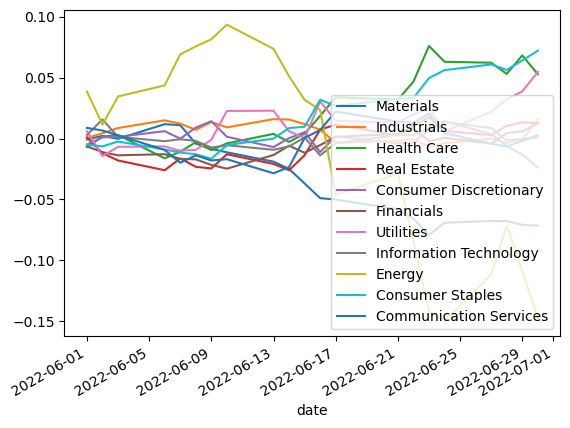

In [85]:
abnormal_cret.plot()

<Axes: xlabel='date'>

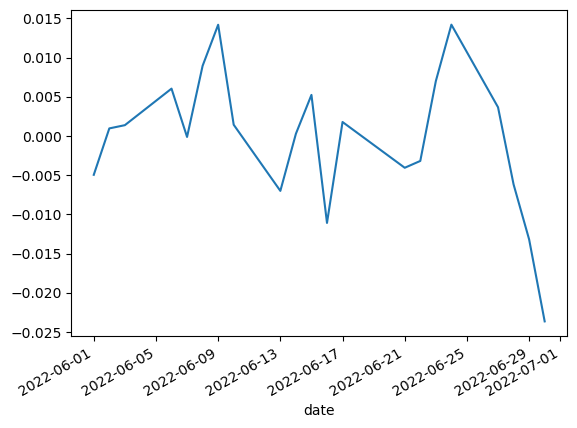

In [86]:
abnormal_cret.loc[:, "Consumer Discretionary"].plot()

In [87]:
subset

,Materials,Industrials,Health Care,Real Estate,Consumer Discretionary,Financials,Utilities,Information Technology,Energy,Consumer Staples,Communication Services
date,,,,,,,,,,,
2022-06-01,-0.007752,-0.006546,-0.013879,-0.006163,-0.011998,-0.013493,-0.001024,-0.004149,0.031442,-0.012131,0.001658
2022-06-02,0.025711,0.026706,0.031172,0.010015,0.028791,0.018150,0.002506,0.035621,-0.004215,0.021507,0.020722
2022-06-03,-0.012852,-0.006220,-0.009076,-0.016527,-0.010098,-0.013113,-0.002978,-0.024792,0.012554,-0.006530,-0.014482
2022-06-06,0.017770,0.012090,-0.013324,-0.002169,0.010475,0.006736,0.006194,0.002241,0.014924,-0.000682,-0.006142
2022-06-07,0.011339,0.009456,0.017536,0.021731,0.005943,0.008271,0.008480,0.013744,0.037547,0.009548,0.001615
2022-06-08,-0.032578,-0.022524,-0.009617,-0.024247,-0.008335,-0.017794,-0.016617,-0.018814,-0.010918,-0.018777,-0.011418
2022-06-09,-0.025193,-0.014492,-0.027342,-0.022213,-0.015624,-0.025448,-0.012666,-0.026272,-0.014942,-0.024523,-0.024962
2022-06-10,-0.030935,-0.032515,-0.022655,-0.016531,-0.040918,-0.031234,-0.004483,-0.026277,-0.016232,-0.017014,-0.027142
2022-06-13,-0.053970,-0.039558,-0.038542,-0.054240,-0.054759,-0.035115,-0.046115,-0.050057,-0.066141,-0.040994,-0.057863


In [92]:
subset.cumsum().loc["2022-06-16",:] - subset.cumsum().loc["2022-06-13",:]

Materials                -0.071726
Industrials              -0.050353
Health Care              -0.027005
Real Estate              -0.013678
Consumer Discretionary   -0.045851
Financials               -0.033620
Utilities                -0.034175
Information Technology   -0.046333
Energy                   -0.091825
Consumer Staples         -0.009881
Communication Services   -0.006262
dtype: float64

In [93]:
drawdown(subset.cumsum())

,Materials,Industrials,Health Care,Real Estate,Consumer Discretionary,Financials,Utilities,Information Technology,Energy,Consumer Staples,Communication Services
date,,,,,,,,,,,
2022-06-01,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,0.000000,-0.000000,0.000000
2022-06-02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.134059,0.000000,0.000000
2022-06-03,0.715600,0.308516,0.524850,4.290490,0.601316,2.815434,2.008727,0.787760,0.000000,0.696536,0.647090
2022-06-06,0.000000,0.000000,1.295330,4.853470,0.000000,1.369040,0.000000,0.716560,0.000000,0.769277,0.921533
2022-06-07,0.000000,0.000000,0.281303,0.000000,0.000000,0.000000,0.000000,0.279853,0.000000,0.000000,0.849351
2022-06-08,0.952121,0.634708,0.837431,3.520573,0.360630,2.715811,1.260910,0.877672,0.118348,1.603292,1.359548
2022-06-09,1.688398,1.043071,2.418526,6.745792,1.036608,6.599858,2.222030,1.712475,0.280315,3.697195,2.474897
2022-06-10,2.592488,1.959331,3.728569,9.145937,2.806925,11.367010,2.562201,2.547432,0.456272,5.149919,3.687672
2022-06-13,4.169797,3.074042,5.957301,17.021195,5.176058,16.726462,6.061477,4.137986,1.173232,8.650251,6.273117
